#### Pandas Part 70: Hexbin Plotting and Pandas Arrays

This notebook covers hexagonal binning plots and introduces pandas arrays and data types.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##### 1. Hexbin Plotting

Hexagonal binning is a form of bivariate histogram that bins points into hexagonal cells. It's useful for visualizing the relationship between two continuous variables, especially when dealing with large datasets where scatter plots might become too crowded.

In [2]:
# Generate random data from a normal distribution
n = 10000
df = pd.DataFrame({
    'x': np.random.randn(n),
    'y': np.random.randn(n)
})

# Display the first few rows
df.head()

,x,y
0,-1.976914,0.255375
1,0.866235,-0.532962
2,0.638478,-0.023019
3,-0.114892,-1.498729
4,-0.093520,-1.369089


Text(0.5, 1.0, 'Hexbin Plot with Default Settings')

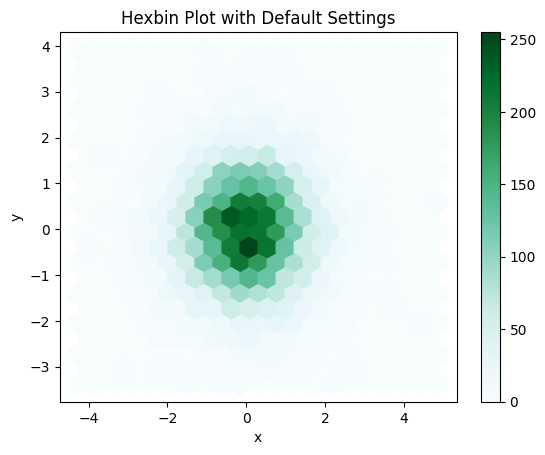

In [3]:
# Create a hexbin plot with default settings
ax = df.plot.hexbin(x='x', y='y', gridsize=20)
plt.title('Hexbin Plot with Default Settings')

### Hexbin with Custom Reduce Function

We can use the `C` parameter to specify values at coordinates and `reduce_C_function` to determine how these values are aggregated within each hexagonal bin.

In [4]:
# Generate data with observations
n = 500
df2 = pd.DataFrame({
    'coord_x': np.random.uniform(-3, 3, size=n),
    'coord_y': np.random.uniform(30, 50, size=n),
    'observations': np.random.randint(1, 5, size=n)
})

# Display the first few rows
df2.head()

,coord_x,coord_y,observations
0,0.986644,31.899616,4
1,-1.450673,33.833585,4
2,1.561035,42.075520,2
3,-1.356344,33.014042,2
4,-2.753747,45.805880,1


Text(0.5, 1.0, 'Hexbin Plot with Sum Reduce Function')

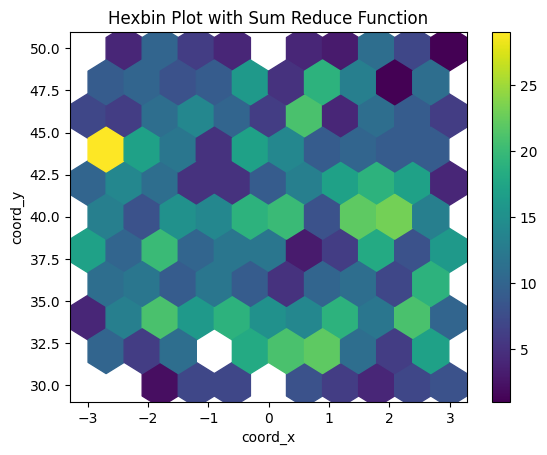

In [5]:
# Create a hexbin plot with sum as the reduce function
ax = df2.plot.hexbin(
    x='coord_x',
    y='coord_y',
    C='observations',
    reduce_C_function=np.sum,
    gridsize=10,
    cmap="viridis"
)
plt.title('Hexbin Plot with Sum Reduce Function')

Text(0.5, 1.0, 'Hexbin Plot with Mean Reduce Function (Default)')

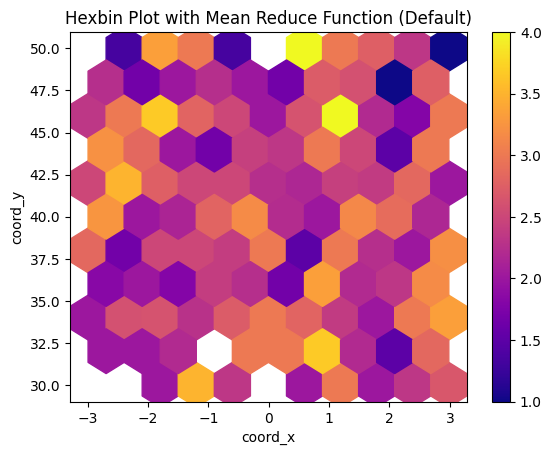

In [6]:
# Create a hexbin plot with mean as the reduce function (default)
ax = df2.plot.hexbin(
    x='coord_x',
    y='coord_y',
    C='observations',
    gridsize=10,
    cmap="plasma"
)
plt.title('Hexbin Plot with Mean Reduce Function (Default)')

Text(0.5, 1.0, 'Hexbin Plot with Max Reduce Function')

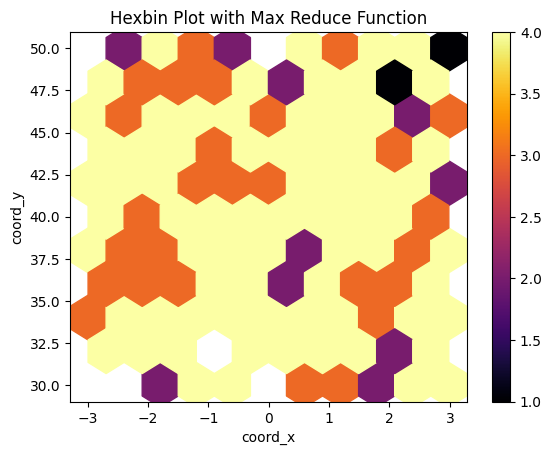

In [7]:
# Create a hexbin plot with max as the reduce function
ax = df2.plot.hexbin(
    x='coord_x',
    y='coord_y',
    C='observations',
    reduce_C_function=np.max,
    gridsize=10,
    cmap="inferno"
)
plt.title('Hexbin Plot with Max Reduce Function')

### Customizing Hexbin Plots

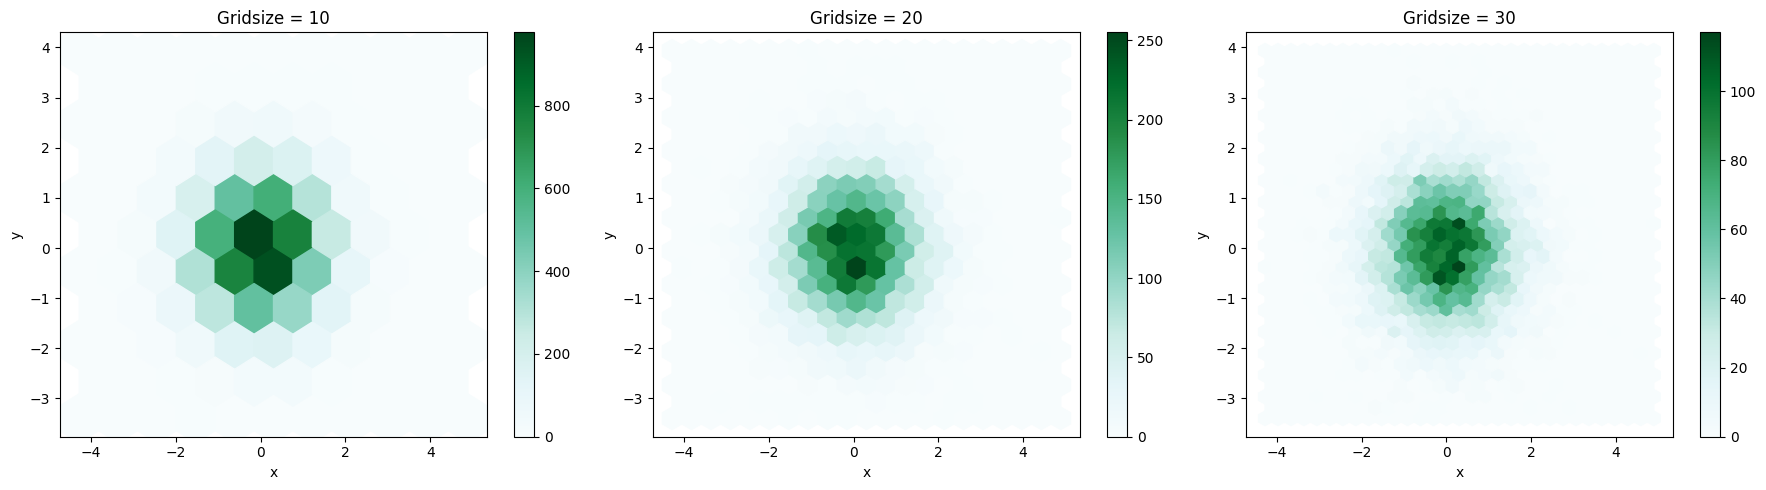

In [8]:
# Create a hexbin plot with custom gridsize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

df.plot.hexbin(x='x', y='y', gridsize=10, ax=axes[0])
axes[0].set_title('Gridsize = 10')

df.plot.hexbin(x='x', y='y', gridsize=20, ax=axes[1])
axes[1].set_title('Gridsize = 20')

df.plot.hexbin(x='x', y='y', gridsize=30, ax=axes[2])
axes[2].set_title('Gridsize = 30')

plt.tight_layout()

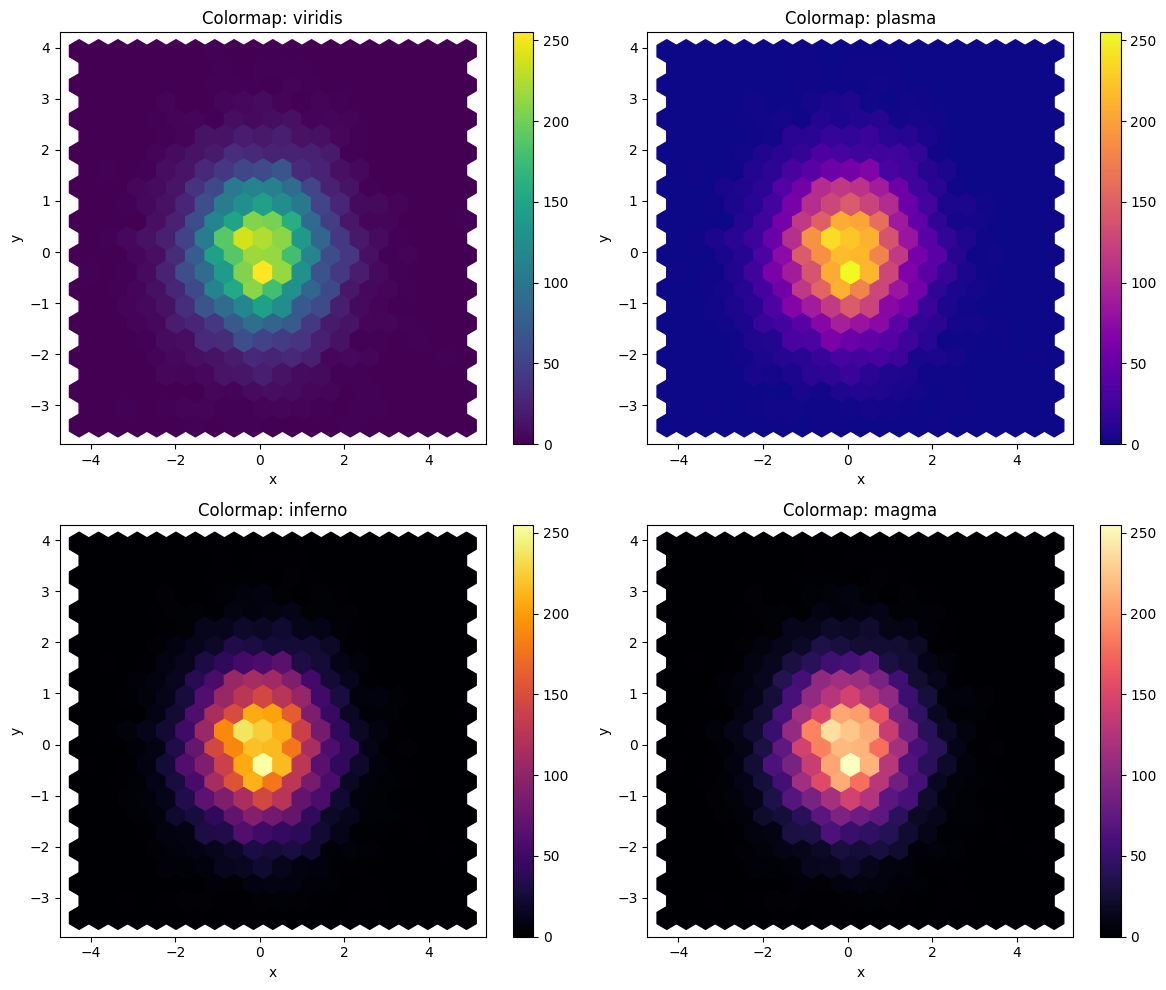

In [9]:
# Create a hexbin plot with different colormaps
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

df.plot.hexbin(x='x', y='y', gridsize=20, cmap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Colormap: viridis')

df.plot.hexbin(x='x', y='y', gridsize=20, cmap='plasma', ax=axes[0, 1])
axes[0, 1].set_title('Colormap: plasma')

df.plot.hexbin(x='x', y='y', gridsize=20, cmap='inferno', ax=axes[1, 0])
axes[1, 0].set_title('Colormap: inferno')

df.plot.hexbin(x='x', y='y', gridsize=20, cmap='magma', ax=axes[1, 1])
axes[1, 1].set_title('Colormap: magma')

plt.tight_layout()

##### 2. Pandas Arrays and Data Types

Pandas extends NumPy's type system with additional data types for various kinds of data. Let's explore some of these data types.

### DatetimeTZDtype - Timezone-aware Datetime

In [10]:
# Create a Series with timezone-aware datetime
dates = pd.date_range('2023-01-01', periods=5, tz='US/Eastern')
s_dates = pd.Series(dates)
s_dates

0   2023-01-01 00:00:00-05:00
1   2023-01-02 00:00:00-05:00
2   2023-01-03 00:00:00-05:00
3   2023-01-04 00:00:00-05:00
4   2023-01-05 00:00:00-05:00
dtype: datetime64[ns, US/Eastern]

In [11]:
# Check the dtype
s_dates.dtype

datetime64[ns, US/Eastern]

### Timedelta Data

In [12]:
# Create a Series with timedelta data
td = pd.Series([pd.Timedelta(days=i) for i in range(5)])
td

0   0 days
1   1 days
2   2 days
3   3 days
4   4 days
dtype: timedelta64[ns]

In [13]:
# Check the dtype
td.dtype

dtype('<m8[ns]')

### Period Data (Time Spans)

In [14]:
# Create a Series with period data
periods = pd.Series(pd.period_range('2023-01', periods=5, freq='M'))
periods

0    2023-01
1    2023-02
2    2023-03
3    2023-04
4    2023-05
dtype: period[M]

In [15]:
# Check the dtype
periods.dtype

period[M]

### Interval Data

In [16]:
# Create a Series with interval data
intervals = pd.Series(pd.interval_range(start=0, end=5))
intervals

0    (0, 1]
1    (1, 2]
2    (2, 3]
3    (3, 4]
4    (4, 5]
dtype: interval

In [17]:
# Check the dtype
intervals.dtype

interval[int64, right]

### Nullable Integer

In [18]:
# Create a Series with nullable integer data
int_with_na = pd.Series([1, 2, None, 4, 5], dtype='Int64')
int_with_na

0       1
1       2
2    <NA>
3       4
4       5
dtype: Int64

In [19]:
# Check the dtype
int_with_na.dtype

Int64Dtype()

### Categorical Data

In [20]:
# Create a Series with categorical data
cat = pd.Series(['a', 'b', 'c', 'a', 'b'], dtype='category')
cat

0    a
1    b
2    c
3    a
4    b
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [21]:
# Check the dtype
cat.dtype

CategoricalDtype(categories=['a', 'b', 'c'], ordered=False, categories_dtype=object)

### Sparse Data

In [22]:
# Create a Series with sparse data
sparse = pd.Series([0, 0, 1, 0, 0, 2, 0, 0, 0]).astype('Sparse')
sparse

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
5    2.0
6    0.0
7    0.0
8    0.0
dtype: Sparse[float64, nan]

In [23]:
# Check the dtype
sparse.dtype

Sparse[float64, nan]

### String Data

In [24]:
# Create a Series with string data
strings = pd.Series(['a', 'b', None, 'd'], dtype='string')
strings

0       a
1       b
2    <NA>
3       d
dtype: string

In [25]:
# Check the dtype
strings.dtype

string[python]

### Boolean Data with Missing Values

In [26]:
# Create a Series with boolean data including missing values
bools = pd.Series([True, False, None, True], dtype='boolean')
bools

0     True
1    False
2     <NA>
3     True
dtype: boolean

In [27]:
# Check the dtype
bools.dtype

BooleanDtype

##### 3. Using pandas.array() Function

The `pandas.array()` function can be used to create arrays with specific data types.

In [28]:
# Create an integer array with missing values
int_array = pd.array([1, 2, None, 4, 5], dtype='Int64')
int_array

<IntegerArray>
[1, 2, <NA>, 4, 5]
Length: 5, dtype: Int64

In [29]:
# Create a boolean array with missing values
bool_array = pd.array([True, False, None, True], dtype='boolean')
bool_array

<BooleanArray>
[True, False, <NA>, True]
Length: 4, dtype: boolean

In [30]:
# Create a string array
string_array = pd.array(['a', 'b', None, 'd'], dtype='string')
string_array

<StringArray>
['a', 'b', <NA>, 'd']
Length: 4, dtype: string

In [31]:
# Create a Series from the array
s = pd.Series(int_array)
s

0       1
1       2
2    <NA>
3       4
4       5
dtype: Int64

In [34]:
# Check the lengths of your arrays
print("Length of int_array:", len(int_array))
print("Length of bool_array:", len(bool_array))
print("Length of string_array:", len(string_array))

# Option 1: Truncate arrays to the shortest length
min_length = min(len(int_array), len(bool_array), len(string_array))
df = pd.DataFrame({
    'integers': int_array[:min_length],
    'booleans': bool_array[:min_length],
    'strings': string_array[:min_length]
})
print("\nDataFrame with truncated arrays:")
print(df)

# Option 2: Pad shorter arrays with None/NaN values
max_length = max(len(int_array), len(bool_array), len(string_array))

# Create padded arrays
padded_int = list(int_array) + [None] * (max_length - len(int_array))
padded_bool = list(bool_array) + [None] * (max_length - len(bool_array))
padded_string = list(string_array) + [None] * (max_length - len(string_array))

df_padded = pd.DataFrame({
    'integers': padded_int,
    'booleans': padded_bool,
    'strings': padded_string
})
print("\nDataFrame with padded arrays:")
print(df_padded)

Length of int_array: 5
Length of bool_array: 4
Length of string_array: 4

DataFrame with truncated arrays:
   integers  booleans strings
0         1      True       a
1         2     False       b
2      <NA>      <NA>    <NA>
3         4      True       d

DataFrame with padded arrays:
  integers booleans strings
0        1     True       a
1        2    False       b
2     <NA>     <NA>    <NA>
3        4     True       d
4        5     None    None


In [35]:
# Check the dtypes
df.dtypes

integers             Int64
booleans           boolean
strings     string[python]
dtype: object